In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,roc_curve, auc
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from spicy import interp
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("./audit3_1.csv")

In [2]:
import logging
logging.basicConfig(filename='output.log', level=logging.DEBUG)
print = logging.debug

In [3]:
# 把各年齡層的Down risk 加上去
def Down_age_risk(value):
    if value == 18:
        return 1210
    if value == 19:
        return 1205
    if value == 20:
        return 1200
    if value == 21:
        return 1185
    if value == 22:
        return 1165
    if value == 23:
        return 1150
    if value == 24:
        return 1120
    if value == 25:
        return 1085
    if value == 26:
        return 1030
    if value == 27:
        return 975
    if value == 28:
        return 900
    if value == 29:
        return 825
    if value == 30:
        return 730
    if value == 31:
        return 630
    if value == 32:
        return 535
    if value == 33:
        return 430
    if value == 34:
        return 345
    if value == 35:
        return 260
    if value == 36:
        return 195
    if value == 37:
        return 145
    if value == 38:
        return 105
    if value == 39:
        return 79
    if value == 40:
        return 60
    if value == 41:
        return 46
    if value == 42:
        return 38
    if value == 43:
        return 31
    if value == 44:
        return 26
    if value == 45:
        return 23
    if value == 46:
        return 21
    if value == 47:
        return 19
    if value == 48:
        return 18
    if value == 49:
        return 18      
    return value

In [4]:
# 把各年齡的唐氏症風險做對應, ex 35 y/o = 260
Down_risk_age = []

for value in df['Mat Age Round']:
    DS_risk =  Down_age_risk(value)
    Down_risk_age.append(DS_risk)

df['Down_risk_age_1'] = Down_risk_age

In [5]:
df.drop(columns=['Date scan'], inplace=True)
df.drop(columns=['Tr21 adjusted risk'], inplace=True)
df.drop(columns=['Date blood test'], inplace=True)
df.drop(columns=['Mat date of birth'], inplace=True)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.keras.utils import to_categorical
ONE =  OneHotEncoder()
Conception_reshape = np.array(df['Conception']).reshape(-1,1)
Conception_encoded = ONE.fit_transform(Conception_reshape)
Conception_ONE = Conception_encoded.toarray()
NB_reshape = np.array(df['Nasal bone']).reshape(-1,1)
NB_encoded = ONE.fit_transform(NB_reshape)
Nasal_bone_ONE = NB_encoded.toarray()
Nasal_bone_ONE = pd.DataFrame(Nasal_bone_ONE)
Conception_ONE = pd.DataFrame(Conception_ONE)
Nasal_bone_ONE.rename(columns={Nasal_bone_ONE.columns[0]: 'NB1'}, inplace=True)
Nasal_bone_ONE.rename(columns={Nasal_bone_ONE.columns[1]: 'NB2'}, inplace=True)
Nasal_bone_ONE.rename(columns={Nasal_bone_ONE.columns[2]: 'NB3'}, inplace=True)
Conception_ONE.rename(columns={Conception_ONE.columns[0]: 'Conception1'}, inplace=True)
Conception_ONE.rename(columns={Conception_ONE.columns[1]: 'Conception2'}, inplace=True)
Conception_ONE.rename(columns={Conception_ONE.columns[2]: 'Conception3'}, inplace=True)
df = pd.concat([df, Nasal_bone_ONE], axis=1)
df = pd.concat([df, Conception_ONE], axis=1)
df=df.drop('Nasal bone', axis=1)
df=df.drop('Conception', axis=1)

In [6]:
df1=df
df1.dropna(inplace=True)
y=df1["class"]
X_features=df1.drop(columns=["class"])

In [7]:
scaleX=StandardScaler().fit_transform(X_features)
X=pd.DataFrame(data=scaleX,columns=X_features.columns)
# 5fold、保留特徵最多的

In [8]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=111)

Resampled dataset shape Counter({0: 2917, 1: 2917})
Classification Report for fold 0 is:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       730
           1       0.13      0.73      0.22        33

    accuracy                           0.78       763
   macro avg       0.56      0.75      0.55       763
weighted avg       0.95      0.78      0.84       763


Resampled dataset shape Counter({0: 2917, 1: 2917})
Classification Report for fold 1 is:
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       730
           1       0.15      0.76      0.25        33

    accuracy                           0.80       763
   macro avg       0.57      0.78      0.57       763
weighted avg       0.95      0.80      0.86       763


Resampled dataset shape Counter({0: 2918, 1: 2918})
Classification Report for fold 2 is:
              precision    recall  f1-score   support

           0       0.9

C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3431669560.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(LRmean_fpr, fpr, tpr))
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3431669560.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(LRmean_fpr, fpr, tpr))
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3431669560.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(LRmean_fpr, fpr, tpr))
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3431669560.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(LRmean_fpr, fpr, tpr))
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3431669560.py:23: DeprecationWarning: scipy.interp is deprecated and w

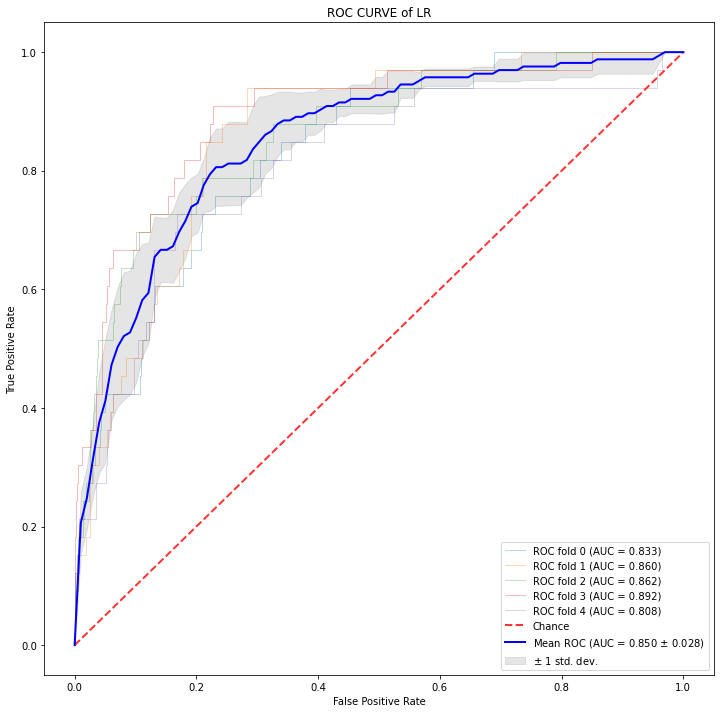

In [9]:
# 創建模型
model1 = LogisticRegression()

# 建立空的列表及圖形
all_true_labels = []
all_predictions = []
tprs = []
aucs = []
LRmean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(12,12))

# 交叉驗證
for i, (train, test) in enumerate(cv.split(X, y)):
    # 訓練模型+預測 
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train))
    X_test, y_test = X.iloc[test], y.iloc[test]
    probas_ = model1.fit(X_train, y_train).predict_proba(X_test) 
    
    # 計算ROC CURVE的
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(LRmean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    
    # 計算AUC
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # 畫出每折的ROC CURVE
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))

    print("Classification Report for fold %d is:\n%s\n" % (i, classification_report(y_test, model1.predict(X_test))))
     # Predict and store results
    test_predictions = model1.predict(X_test).round().flatten()
    all_true_labels.extend(y_test.tolist())
    all_predictions.extend(test_predictions.tolist())

# Classification report for all folds combined
print("Classification Report for All Folds:")
print(classification_report(all_true_labels, all_predictions, target_names=['Class 0', 'Class 1']))
# 畫出預測的ROC CURVE
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# 計算平均ROC CURVE
LRmean_tpr = np.mean(tprs, axis=0)
LRmean_tpr[-1] = 1.0
LRmean_auc = auc(LRmean_fpr, LRmean_tpr)

# 計算標準差
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)

# 計算信賴區間
tprs_upper = np.minimum(LRmean_tpr + std_tpr, 1)
tprs_lower = np.maximum(LRmean_tpr - std_tpr, 0)

# 畫出平均ROC CURVE和標準差區間
plt.plot(LRmean_fpr, LRmean_tpr, color='b', label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (LRmean_auc, std_auc), lw=2)
plt.fill_between(LRmean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

# 加標籤跟標題
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of LR')
plt.legend(loc="lower right")

# 顯示
plt.show()


Resampled dataset shape Counter({0: 2917, 1: 2917})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3568820614.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(XGBmean_fpr, fpr, tpr))


Classification Report for fold 0 is:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       730
           1       0.41      0.27      0.33        33

    accuracy                           0.95       763
   macro avg       0.69      0.63      0.65       763
weighted avg       0.94      0.95      0.95       763


Resampled dataset shape Counter({0: 2917, 1: 2917})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3568820614.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(XGBmean_fpr, fpr, tpr))


Classification Report for fold 1 is:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       730
           1       0.54      0.45      0.49        33

    accuracy                           0.96       763
   macro avg       0.76      0.72      0.74       763
weighted avg       0.96      0.96      0.96       763


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3568820614.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(XGBmean_fpr, fpr, tpr))


Classification Report for fold 2 is:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       729
           1       0.42      0.24      0.31        33

    accuracy                           0.95       762
   macro avg       0.69      0.61      0.64       762
weighted avg       0.94      0.95      0.95       762


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3568820614.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(XGBmean_fpr, fpr, tpr))


Classification Report for fold 3 is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       729
           1       0.62      0.39      0.48        33

    accuracy                           0.96       762
   macro avg       0.80      0.69      0.73       762
weighted avg       0.96      0.96      0.96       762


Resampled dataset shape Counter({0: 2918, 1: 2918})
Classification Report for fold 4 is:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       729
           1       0.38      0.36      0.37        33

    accuracy                           0.95       762
   macro avg       0.67      0.67      0.67       762
weighted avg       0.95      0.95      0.95       762


Classification Report for All Folds:
              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98      3647
     Class 1       0.47      0.35      0.40       165

    accuracy     

C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3568820614.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(XGBmean_fpr, fpr, tpr))


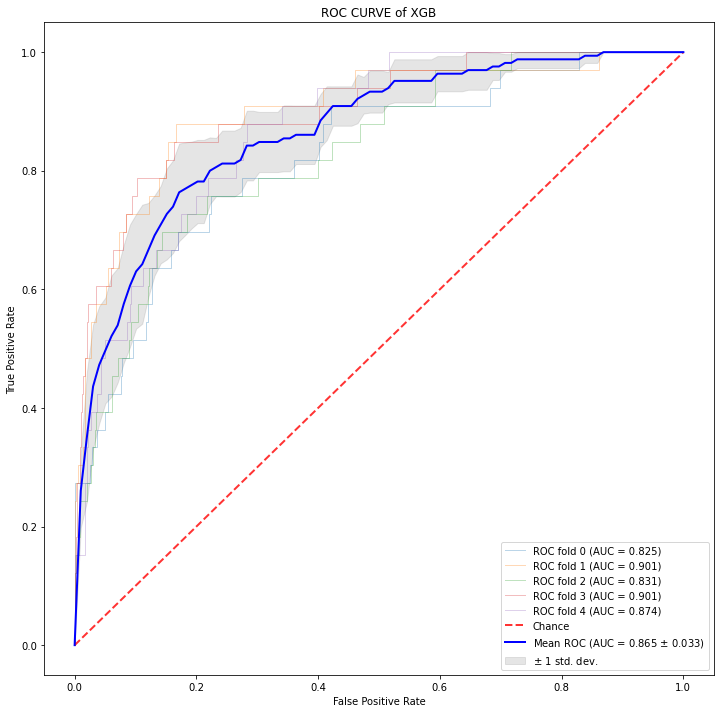

In [10]:
model2=XGBClassifier()
all_true_labels = []
all_predictions = []
tprs = []
aucs = []
XGBmean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(12,12))

for i, (train, test) in enumerate(cv.split(X, y)):
    # 訓練模型+預測 
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train))
    X_test, y_test = X.iloc[test], y.iloc[test]
    probas_ = model2.fit(X_train, y_train).predict_proba(X_test) 
    
    # 計算ROC CURVE的
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(XGBmean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    
    # 計算AUC
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # 畫出每折的ROC CURVE
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))

    print("Classification Report for fold %d is:\n%s\n" % (i, classification_report(y_test, model2.predict(X_test))))
     # Predict and store results
    test_predictions = model2.predict(X_test).round().flatten()
    all_true_labels.extend(y_test.tolist())
    all_predictions.extend(test_predictions.tolist())


# Classification report for all folds combined
print("Classification Report for All Folds:")
print(classification_report(all_true_labels, all_predictions, target_names=['Class 0', 'Class 1']))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

XGBmean_tpr = np.mean(tprs, axis=0)
XGBmean_tpr[-1] = 1.0
XGBmean_auc = auc(XGBmean_fpr, XGBmean_tpr)

std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)


tprs_upper = np.minimum(XGBmean_tpr + std_tpr, 1)
tprs_lower = np.maximum(XGBmean_tpr - std_tpr, 0)

plt.plot(XGBmean_fpr, XGBmean_tpr, color='b', label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (XGBmean_auc, std_auc), lw=2)
plt.fill_between(XGBmean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of XGB')
plt.legend(loc="lower right")

plt.show()

Resampled dataset shape Counter({0: 2917, 1: 2917})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1232215735.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(SVCmean_fpr, fpr, tpr))


Classification Report for fold 0 is:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       730
           1       0.15      0.73      0.24        33

    accuracy                           0.81       763
   macro avg       0.57      0.77      0.57       763
weighted avg       0.95      0.81      0.86       763


Resampled dataset shape Counter({0: 2917, 1: 2917})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1232215735.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(SVCmean_fpr, fpr, tpr))


Classification Report for fold 1 is:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       730
           1       0.14      0.61      0.23        33

    accuracy                           0.83       763
   macro avg       0.56      0.72      0.57       763
weighted avg       0.94      0.83      0.87       763


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1232215735.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(SVCmean_fpr, fpr, tpr))


Classification Report for fold 2 is:
              precision    recall  f1-score   support

           0       0.99      0.82      0.89       729
           1       0.16      0.76      0.26        33

    accuracy                           0.81       762
   macro avg       0.57      0.79      0.58       762
weighted avg       0.95      0.81      0.87       762


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1232215735.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(SVCmean_fpr, fpr, tpr))


Classification Report for fold 3 is:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       729
           1       0.14      0.70      0.23        33

    accuracy                           0.79       762
   macro avg       0.56      0.75      0.55       762
weighted avg       0.95      0.79      0.85       762


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1232215735.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(SVCmean_fpr, fpr, tpr))


Classification Report for fold 4 is:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90       729
           1       0.15      0.70      0.25        33

    accuracy                           0.82       762
   macro avg       0.57      0.76      0.57       762
weighted avg       0.95      0.82      0.87       762


Classification Report for All Folds:
              precision    recall  f1-score   support

     Class 0       0.98      0.82      0.89      3647
     Class 1       0.15      0.70      0.24       165

    accuracy                           0.81      3812
   macro avg       0.57      0.76      0.57      3812
weighted avg       0.95      0.81      0.86      3812



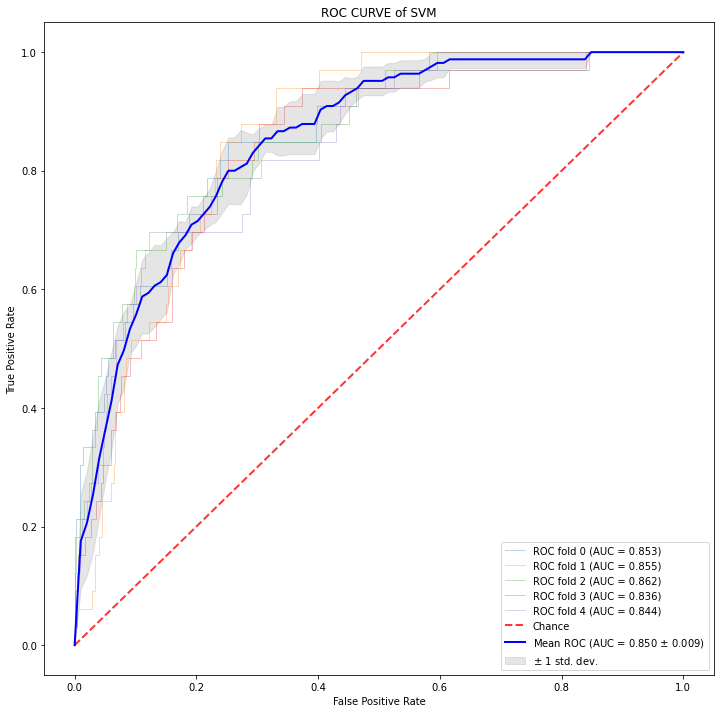

In [11]:
model3=SVC(probability=True)
all_true_labels = []
all_predictions = []
tprs = []
aucs = []
SVCmean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(12,12))
for i, (train, test) in enumerate(cv.split(X, y)):
    # 訓練模型+預測 
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train))
    X_test, y_test = X.iloc[test], y.iloc[test]
    probas_ = model3.fit(X_train, y_train).predict_proba(X_test) 
    
    # 計算ROC CURVE的
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(SVCmean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    
    # 計算AUC
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # 畫出每折的ROC CURVE
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))

    print("Classification Report for fold %d is:\n%s\n" % (i, classification_report(y_test, model3.predict(X_test))))
    # Predict and store results
    test_predictions = model3.predict(X_test).round().flatten()
    all_true_labels.extend(y_test.tolist())
    all_predictions.extend(test_predictions.tolist())


# Classification report for all folds combined
print("Classification Report for All Folds:")
print(classification_report(all_true_labels, all_predictions, target_names=['Class 0', 'Class 1']))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

SVCmean_tpr = np.mean(tprs, axis=0)
SVCmean_tpr[-1] = 1.0
SVCmean_auc = auc(SVCmean_fpr, SVCmean_tpr)

std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)


tprs_upper = np.minimum(SVCmean_tpr + std_tpr, 1)
tprs_lower = np.maximum(SVCmean_tpr - std_tpr, 0)

plt.plot(SVCmean_fpr, SVCmean_tpr, color='b', label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (SVCmean_auc, std_auc), lw=2)
plt.fill_between(SVCmean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of SVM')
plt.legend(loc="lower right")

plt.show()

Resampled dataset shape Counter({0: 2917, 1: 2917})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\83652030.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(RFmean_fpr, fpr, tpr))


Classification Report for fold 0 is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       730
           1       0.64      0.21      0.32        33

    accuracy                           0.96       763
   macro avg       0.80      0.60      0.65       763
weighted avg       0.95      0.96      0.95       763


Resampled dataset shape Counter({0: 2917, 1: 2917})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\83652030.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(RFmean_fpr, fpr, tpr))


Classification Report for fold 1 is:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       730
           1       0.82      0.27      0.41        33

    accuracy                           0.97       763
   macro avg       0.89      0.63      0.70       763
weighted avg       0.96      0.97      0.96       763


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\83652030.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(RFmean_fpr, fpr, tpr))


Classification Report for fold 2 is:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       729
           1       0.83      0.15      0.26        33

    accuracy                           0.96       762
   macro avg       0.90      0.58      0.62       762
weighted avg       0.96      0.96      0.95       762


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\83652030.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(RFmean_fpr, fpr, tpr))


Classification Report for fold 3 is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       729
           1       0.67      0.24      0.36        33

    accuracy                           0.96       762
   macro avg       0.82      0.62      0.67       762
weighted avg       0.95      0.96      0.95       762


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\AppData\Local\Temp\ipykernel_26456\83652030.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(RFmean_fpr, fpr, tpr))


Classification Report for fold 4 is:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       729
           1       0.62      0.15      0.24        33

    accuracy                           0.96       762
   macro avg       0.79      0.57      0.61       762
weighted avg       0.95      0.96      0.95       762


Classification Report for All Folds:
              precision    recall  f1-score   support

     Class 0       0.97      1.00      0.98      3647
     Class 1       0.71      0.21      0.32       165

    accuracy                           0.96      3812
   macro avg       0.84      0.60      0.65      3812
weighted avg       0.95      0.96      0.95      3812



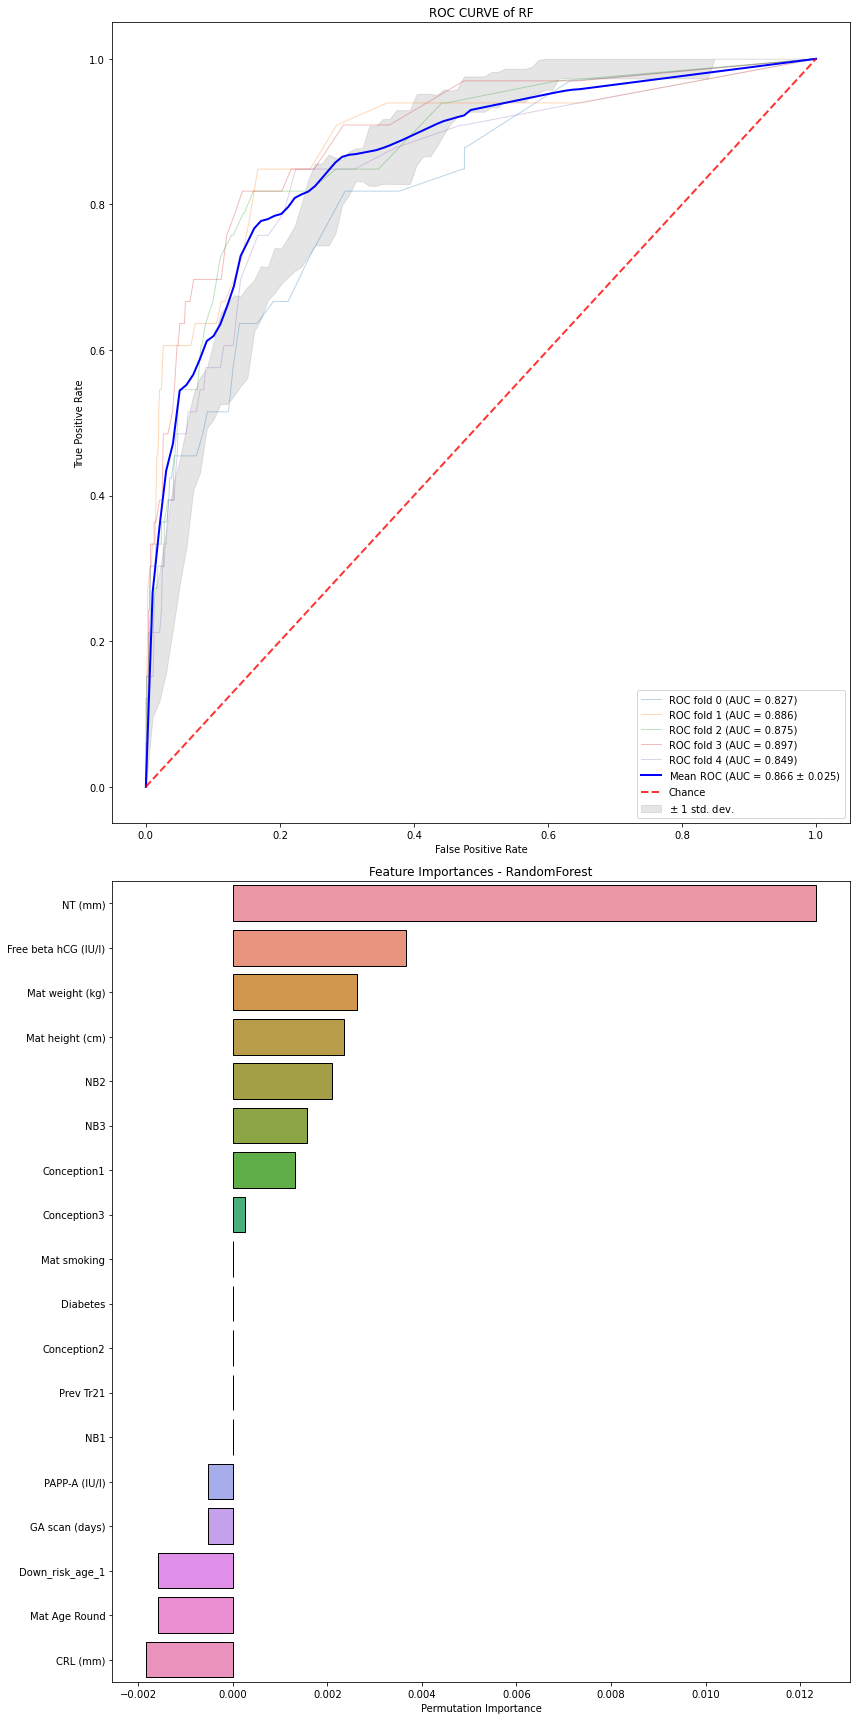

In [12]:
rf_model = RandomForestClassifier()
all_true_labels = []
all_predictions = []
tprs = []
aucs = []
RFmean_fpr = np.linspace(0, 1, 100)

# 创建一个图形用于绘制 ROC 曲线和特征重要性的图表
plt.figure(figsize=(12, 24))

for i, (train, test) in enumerate(cv.split(X, y)):
    # 训练模型+预测
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train))
    X_test, y_test = X.iloc[test], y.iloc[test]
    probas_ = rf_model.fit(X_train, y_train).predict_proba(X_test)

    # 计算 ROC 曲线
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(RFmean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    # 计算 AUC
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # 画出每折的 ROC 曲线
    plt.subplot(2, 1, 1)  # 第一个子图：ROC 曲线
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
    print("Classification Report for fold %d is:\n%s\n" % (i, classification_report(y_test, rf_model.predict(X_test))))
    # Predict and store results
    test_predictions = rf_model.predict(X_test).round().flatten()
    all_true_labels.extend(y_test.tolist())
    all_predictions.extend(test_predictions.tolist())

    # 计算特征重要性
    from sklearn.inspection import permutation_importance
    importances = pd.Series(permutation_importance(rf_model, X.iloc[test], y.iloc[test]).importances_mean, index=X.iloc[test].columns)
    importances.sort_values(ascending=False, inplace=True)

# Classification report for all folds combined
print("Classification Report for All Folds:")
print(classification_report(all_true_labels, all_predictions, target_names=['Class 0', 'Class 1']))
# 计算平均 ROC 曲线和标准差
RFmean_tpr = np.mean(tprs, axis=0)
RFmean_tpr[-1] = 1.0
RFmean_auc = auc(RFmean_fpr, RFmean_tpr)
std_auc = np.std(aucs)

# 绘制平均 ROC 曲线
plt.subplot(2, 1, 1)  # 返回第一个子图
plt.plot(RFmean_fpr, RFmean_tpr, color='b', label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (RFmean_auc, std_auc), lw=2)
plt.fill_between(RFmean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.subplot(2, 1, 2)  # 第二个子图：特征重要性
sns.barplot(x=importances.values, y=importances.index, edgecolor="black")
plt.xlabel("Permutation Importance")
plt.title("Feature Importances - RandomForest")

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of RF')
plt.legend(loc="lower right")


plt.savefig('feature_importance.png')
plt.tight_layout()  # 调整子图之间的间距
plt.show()



Resampled dataset shape Counter({0: 2917, 1: 2917})
Classification Report for fold 0 is:
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       730
           1       0.08      0.55      0.15        33

    accuracy                           0.72       763
   macro avg       0.53      0.64      0.49       763
weighted avg       0.93      0.72      0.81       763


Resampled dataset shape Counter({0: 2917, 1: 2917})
Classification Report for fold 1 is:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       730
           1       0.08      0.33      0.13        33

    accuracy                           0.81       763
   macro avg       0.52      0.58      0.51       763
weighted avg       0.93      0.81      0.86       763


Resampled dataset shape Counter({0: 2918, 1: 2918})
Classification Report for fold 2 is:
              precision    recall  f1-score   support

           0       0.9

C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1003622621.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(DTmean_fpr, fpr, tpr))
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1003622621.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(DTmean_fpr, fpr, tpr))
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1003622621.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(DTmean_fpr, fpr, tpr))
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1003622621.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(DTmean_fpr, fpr, tpr))
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\1003622621.py:20: DeprecationWarning: scipy.interp is deprecated and w

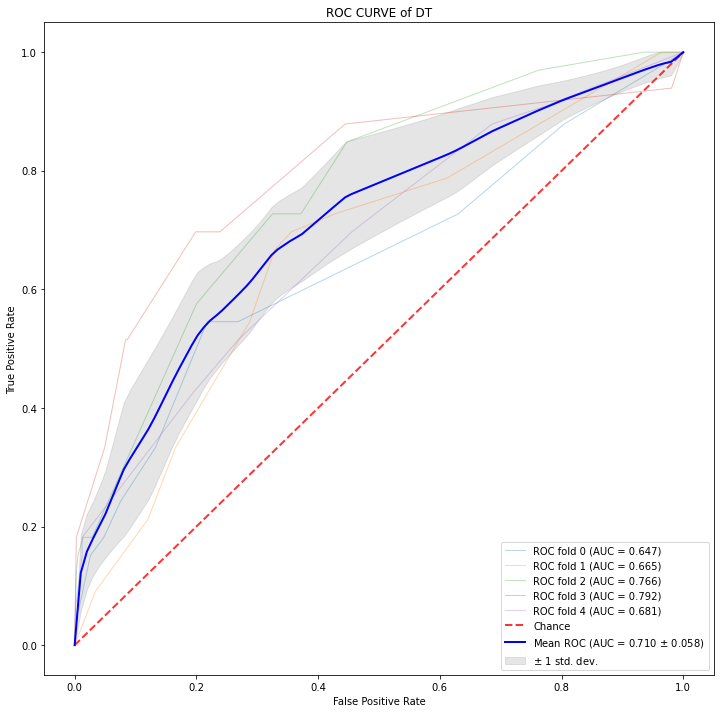

In [13]:
dt_model=DecisionTreeClassifier(criterion='entropy',
 max_depth= 4,max_features='sqrt', min_samples_leaf= 10)
all_true_labels = []
all_predictions = []
tprs = []
aucs = []
DTmean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(12,12))

for i, (train, test) in enumerate(cv.split(X, y)):
    # 訓練模型+預測 
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train))
    X_test, y_test = X.iloc[test], y.iloc[test]
    probas_ = dt_model.fit(X_train, y_train).predict_proba(X_test) 
    
    # 計算ROC CURVE的
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(DTmean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    
    # 計算AUC
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # 畫出每折的ROC CURVE
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))

    print("Classification Report for fold %d is:\n%s\n" % (i, classification_report(y_test, dt_model.predict(X_test))))
    # Predict and store results
    test_predictions = dt_model.predict(X_test).round().flatten()
    all_true_labels.extend(y_test.tolist())
    all_predictions.extend(test_predictions.tolist())


# Classification report for all folds combined
print("Classification Report for All Folds:")
print(classification_report(all_true_labels, all_predictions, target_names=['Class 0', 'Class 1']))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

DTmean_tpr = np.mean(tprs, axis=0)
DTmean_tpr[-1] = 1.0
DTmean_auc = auc(DTmean_fpr, DTmean_tpr)

std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)


tprs_upper = np.minimum(DTmean_tpr + std_tpr, 1)
tprs_lower = np.maximum(DTmean_tpr - std_tpr, 0)

plt.plot(DTmean_fpr, DTmean_tpr, color='b', label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (DTmean_auc, std_auc), lw=2)
plt.fill_between(DTmean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of DT')
plt.legend(loc="lower right")

plt.show()

Resampled dataset shape Counter({0: 2917, 1: 2917})


C:\Users\charl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3599277438.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(MLPmean_fpr, fpr, tpr))


Classification Report for fold 0 is:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       730
           1       0.23      0.42      0.30        33

    accuracy                           0.91       763
   macro avg       0.60      0.68      0.63       763
weighted avg       0.94      0.91      0.93       763


Resampled dataset shape Counter({0: 2917, 1: 2917})


C:\Users\charl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3599277438.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(MLPmean_fpr, fpr, tpr))


Classification Report for fold 1 is:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       730
           1       0.20      0.33      0.25        33

    accuracy                           0.91       763
   macro avg       0.59      0.64      0.60       763
weighted avg       0.94      0.91      0.92       763


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3599277438.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(MLPmean_fpr, fpr, tpr))


Classification Report for fold 2 is:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       729
           1       0.23      0.48      0.31        33

    accuracy                           0.91       762
   macro avg       0.60      0.71      0.63       762
weighted avg       0.94      0.91      0.92       762


Resampled dataset shape Counter({0: 2918, 1: 2918})


C:\Users\charl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3599277438.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(MLPmean_fpr, fpr, tpr))


Classification Report for fold 3 is:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       729
           1       0.19      0.36      0.25        33

    accuracy                           0.91       762
   macro avg       0.58      0.65      0.60       762
weighted avg       0.94      0.91      0.92       762


Resampled dataset shape Counter({0: 2918, 1: 2918})
Classification Report for fold 4 is:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       729
           1       0.18      0.42      0.25        33

    accuracy                           0.89       762
   macro avg       0.57      0.67      0.60       762
weighted avg       0.94      0.89      0.91       762


Classification Report for All Folds:
              precision    recall  f1-score   support

     Class 0       0.97      0.93      0.95      3647
     Class 1       0.21      0.41      0.27       165

    accuracy     

C:\Users\charl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\charl\AppData\Local\Temp\ipykernel_26456\3599277438.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(MLPmean_fpr, fpr, tpr))


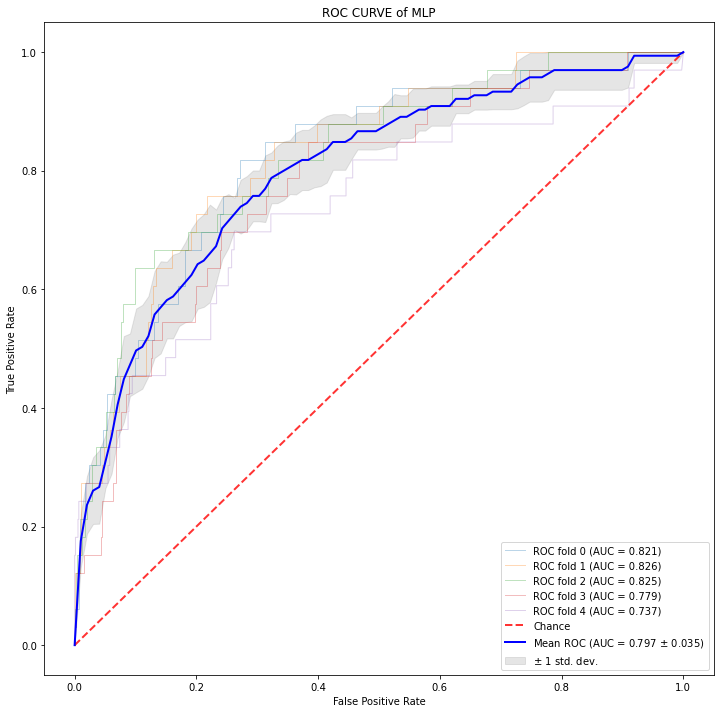

In [14]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10), max_iter=300,batch_size=256,solver='adam')
all_true_labels = []
all_predictions = []
tprs = []
aucs = []
MLPmean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(12,12))
for i, (train, test) in enumerate(cv.split(X, y)):
    # 訓練模型+預測 
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train))
    X_test, y_test = X.iloc[test], y.iloc[test]
    probas_ = mlp.fit(X_train, y_train).predict_proba(X_test) 
    
    # 計算ROC CURVE的
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(MLPmean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    
    # 計算AUC
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # 畫出每折的ROC CURVE
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))

    print("Classification Report for fold %d is:\n%s\n" % (i, classification_report(y_test, mlp.predict(X_test))))
    # Predict and store results
    test_predictions = mlp.predict(X_test).round().flatten()
    all_true_labels.extend(y_test.tolist())
    all_predictions.extend(test_predictions.tolist())


# Classification report for all folds combined
print("Classification Report for All Folds:")
print(classification_report(all_true_labels, all_predictions, target_names=['Class 0', 'Class 1']))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

MLPmean_tpr = np.mean(tprs, axis=0)
MLPmean_tpr[-1] = 1.0
MLPmean_auc = auc(MLPmean_fpr, MLPmean_tpr)

std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)


tprs_upper = np.minimum(MLPmean_tpr + std_tpr, 1)
tprs_lower = np.maximum(MLPmean_tpr - std_tpr, 0)

plt.plot(MLPmean_fpr, MLPmean_tpr, color='b', label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (MLPmean_auc, std_auc), lw=2)
plt.fill_between(MLPmean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of MLP')
plt.legend(loc="lower right")

plt.show()

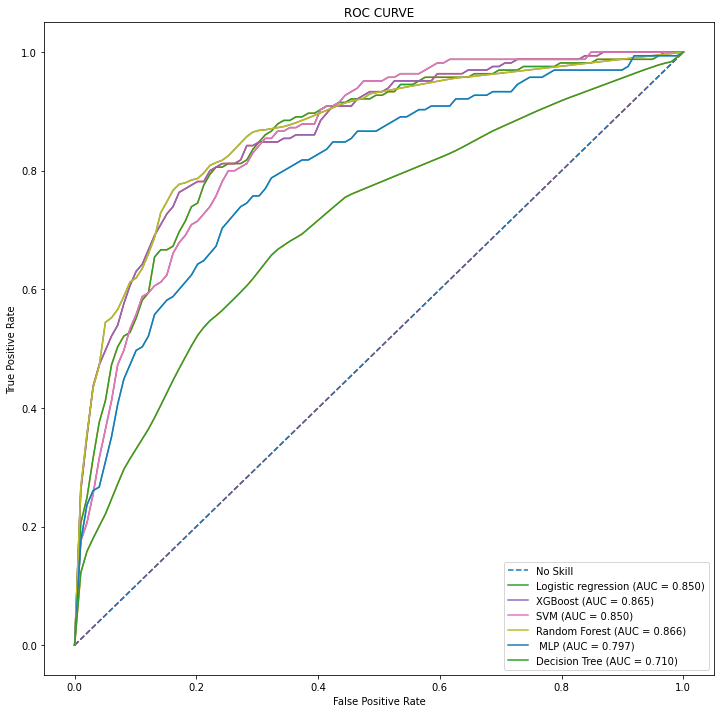

In [15]:
plt.figure(figsize=(12,12))
plt.plot([0,1], [0,1], "r--")
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LRmean_fpr, LRmean_tpr)
plt.plot(LRmean_fpr, LRmean_tpr, label='Logistic regression (AUC = %0.3f)' % (LRmean_auc))
plt.plot(XGBmean_fpr, XGBmean_tpr)
plt.plot(XGBmean_fpr, XGBmean_tpr, label='XGBoost (AUC = %0.3f)' % (XGBmean_auc))
plt.plot(SVCmean_fpr, SVCmean_tpr)
plt.plot(SVCmean_fpr, SVCmean_tpr, label='SVM (AUC = %0.3f)' % (SVCmean_auc))
plt.plot(RFmean_fpr, RFmean_tpr)
plt.plot(RFmean_fpr, RFmean_tpr, label='Random Forest (AUC = %0.3f)' % (RFmean_auc))
plt.plot(MLPmean_fpr, MLPmean_tpr)
plt.plot(MLPmean_fpr, MLPmean_tpr, label=' MLP (AUC = %0.3f)' % (MLPmean_auc))
plt.plot(DTmean_fpr, DTmean_tpr)
plt.plot(DTmean_fpr, DTmean_tpr, label='Decision Tree (AUC = %0.3f)' % (DTmean_auc))
plt.legend()
plt.title("ROC CURVE")
plt.savefig('result.png')
plt.show()

Resampled dataset shape Counter({0: 2917, 1: 2917})
Epoch 1/20
92/92 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7923
Epoch 2/20
92/92 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8809
Epoch 3/20
92/92 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 0.9158
Epoch 4/20
92/92 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9405
Epoch 5/20
92/92 [==============================] - 0s 944us/step - loss: 0.1220 - accuracy: 0.9577
Epoch 6/20
92/92 [==============================] - 0s 967us/step - loss: 0.0941 - accuracy: 0.9688
Epoch 7/20
92/92 [==============================] - 0s 982us/step - loss: 0.0939 - accuracy: 0.9673
Epoch 8/20
92/92 [==============================] - 0s 886us/step - loss: 0.0843 - accuracy: 0.9721
Epoch 9/20
92/92 [==============================] - 0s 971us/step - loss: 0.0621 - accuracy: 0.9820
Epoch 10/20
92/92 [==============================] - 0s 

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x0000024145E3EC40> does not.

<Figure size 864x864 with 0 Axes>

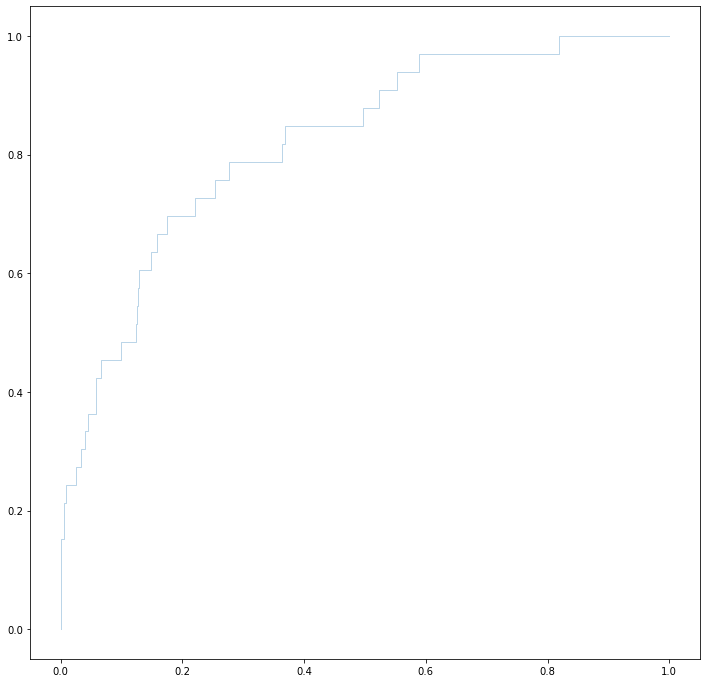

In [27]:
#ChatGPT code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import History

# Define your model
Down_model = Sequential([
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(1, activation='sigmoid')
])
Down_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare cross-validation
tprs = []
aucs = []
all_true_labels = []
all_predictions = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(12,12))
for i, (train, test) in enumerate(cv.split(X, y)):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train))
    
    X_test, y_test = X.iloc[test], y.iloc[test]
    
    # Train the model
    history = Down_model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)
    
    # Predict probabilities
    probas_ = Down_model.predict(X_test)
    
    # Calculate ROC curve and area under the curve
    plt.figure(figsize=(12,12))
    fpr, tpr, thresholds = roc_curve(y_test, probas_.ravel())
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # Plot ROC curve for the current fold
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
    print("Classification Report for fold %d is:\n%s\n" % (i, classification_report(y_test, Down_model.predict(X_test).round())))

    # Predict and store results
    test_predictions = Down_model.predict(X_test).round().flatten()
    all_true_labels.extend(y_test.tolist())
    all_predictions.extend(test_predictions.tolist())

# Classification report for all folds combined
print("Classification Report for All Folds:")
print(classification_report(all_true_labels, all_predictions, target_names=['Class 0', 'Class 1']))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)

# 绘制平均 ROC 曲线
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc), lw=2)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of RF')
plt.legend(loc="lower right")

plt.savefig('ANNfeature_importance.png')
plt.tight_layout()  # 调整子图之间的间距
plt.show()
